In [1]:
import numpy as np
import pandas as pd
from Bio.Pathway import Network
from network import EVOLUNET
from evolution import Evolution
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
import csv

In [2]:
def plot_dataset(data):
    X = data[0]
    y = data[1]
    # Plot linear classification
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    plt.show()


In [3]:
def read_dataset_csv(filename,header = None):
    X = []
    y = []
    with open(filename, 'r') as f:
        datasets = csv.reader(f, delimiter=',')
        if header:
            next(datasets,None)
        for row in datasets:
            X.append((float(row[0]),float(row[1])))
            y.append(int(float(row[2])))
    return np.array(X), np.array(y)


# Gaussien data

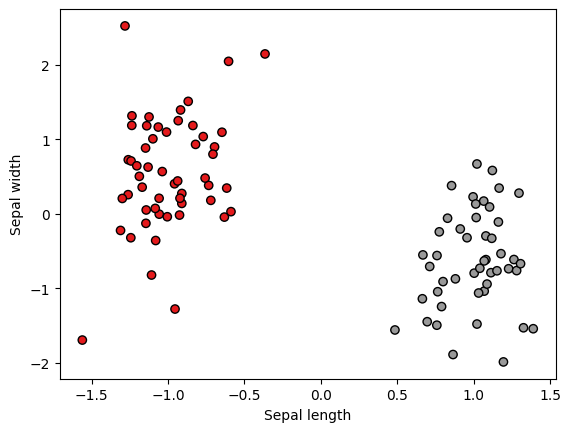

In [4]:
X,y = datasets.make_blobs(n_samples=400,shuffle=True,centers=2,cluster_std=1.7)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train, y_test = train_test_split(X_scaled,y,test_size=0.75)
train_data = (X_train, y_train)
test_data  =(X_test,y_test)
plot_dataset(train_data)

Generation 0
{(<network.EVOLUNET object at 0x11c6025d0>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c6012b0>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c6017c0>, np.float64(0.4067796610169492)), (<network.EVOLUNET object at 0x11c602030>, 0), (<network.EVOLUNET object at 0x11c6015b0>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c6021b0>, 0), (<network.EVOLUNET object at 0x11c368950>, np.float64(0.7228915662650603)), (<network.EVOLUNET object at 0x11c6010a0>, np.float64(0.7540983606557378)), (<network.EVOLUNET object at 0x11c602120>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c603f80>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c601be0>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c602a50>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c602000>, np.float64(0.6394557823129251)), (<network.EVOLUNET object at 0x11c600ce0>, np.float64(0.

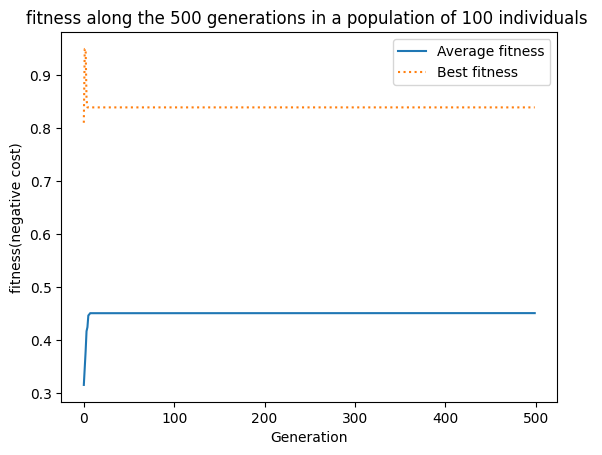

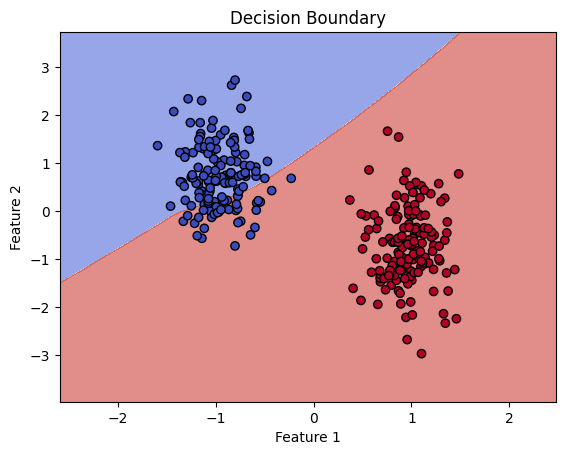

In [6]:
network_sizes = [2,3,2,1]
#Initialize the population
new_population = Evolution(network_sizes,100,500)

#Run the evolution
best_network = new_population.generation_evolution(train_data,crossover=True)

print(best_network.evaluate(test_data))
new_population.plot_fitness()
best_network.plot_decision_boundary(test_data)


# Circles data

In [7]:
X,y = datasets.make_circles(n_samples=400,noise = 0.05, factor = 0.5)

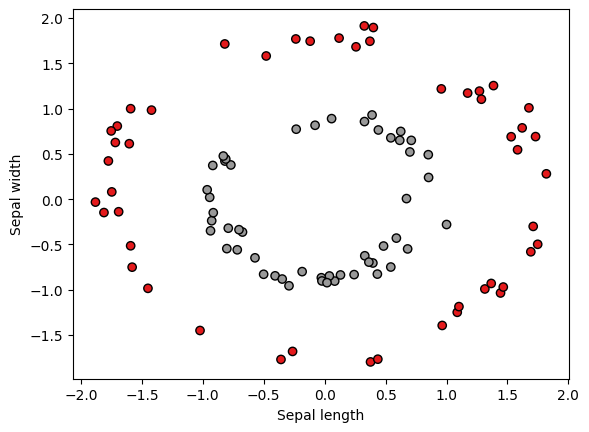

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train, y_test = train_test_split(X_scaled,y,test_size=0.75)
train_data = (X_train, y_train)
test_data  =(X_test,y_test)
plot_dataset(train_data)

Generation 0
Generation 10
Generation 20
Generation 30
Generation 40
Generation 50
Generation 60
Generation 70
Generation 80
Generation 90
Generation 100
Generation 110
Generation 120
Generation 130
Generation 140
Generation 150
Generation 160
Generation 170
Generation 180
Generation 190
Generation 200
Generation 210
Generation 220
Generation 230
Generation 240
Generation 250
Generation 260
Generation 270
Generation 280
Generation 290
Generation 300
Generation 310
Generation 320
Generation 330
Generation 340
Generation 350
Generation 360
Generation 370
Generation 380
Generation 390
Generation 400
Generation 410
Generation 420
Generation 430
Generation 440
Generation 450
Generation 460
Generation 470
Generation 480
Generation 490
Generation 500
Generation 510
Generation 520
Generation 530
Generation 540
Generation 550
Generation 560
Generation 570
Generation 580
Generation 590
Generation 600
Generation 610
Generation 620
Generation 630
Generation 640
Generation 650
Generation 660
Genera

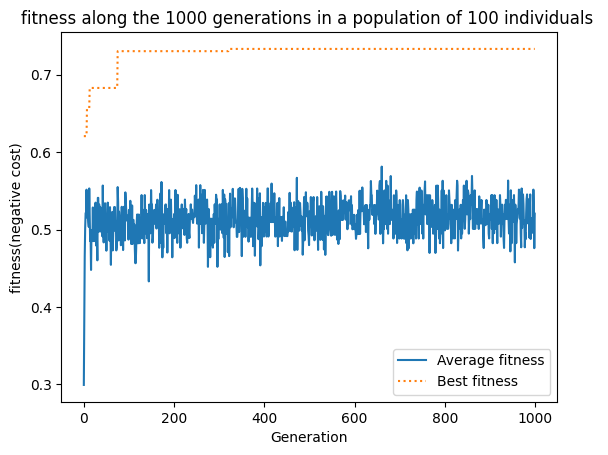

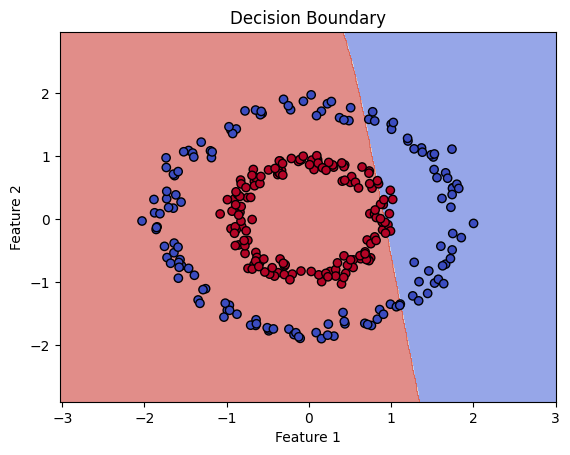

In [19]:
network_sizes = [2,6,8,1]
#Initialize the population
new_population = Evolution(network_sizes,100,400)

#Run the evolution
best_network = new_population.generation_evolution(train_data,crossover=True)

print(best_network.evaluate(test_data))
new_population.plot_fitness()
best_network.plot_decision_boundary(test_data)


In [25]:
list_f1 = [0]
best_structure = None
for i in range(6,9):
    for j in range(8,12):
        network_sizes = [2,i,j,1]
        new_population = Evolution(network_sizes,100,500)
        best_network = new_population.generation_evolution(train_data)
        res_test =best_network.evaluate(test_data)
        if res_test > max(list_f1):
            best_structure = network_sizes
        list_f1.append(res_test)
print(f"best performance : {max(list_f1)}")

Generation 0
Generation 10
Generation 20
Generation 30
Generation 40
Generation 50
Generation 60
Generation 70
Generation 80
Generation 90
Generation 100
Generation 110
Generation 120
Generation 130
Generation 140
Generation 150
Generation 160
Generation 170
Generation 180
Generation 190
Generation 200
Generation 210
Generation 220
Generation 230
Generation 240
Generation 250
Generation 260
Generation 270
Generation 280
Generation 290
Generation 300
Generation 310
Generation 320
Generation 330
Generation 340
Generation 350
Generation 360
Generation 370
Generation 380
Generation 390
Generation 400
Generation 410
Generation 420
Generation 430
Generation 440
Generation 450
Generation 460
Generation 470
Generation 480
Generation 490
learning process finished
Generation 0
Generation 10
Generation 20
Generation 30
Generation 40
Generation 50
Generation 60
Generation 70
Generation 80
Generation 90
Generation 100
Generation 110
Generation 120
Generation 130
Generation 140
Generation 150
Genera

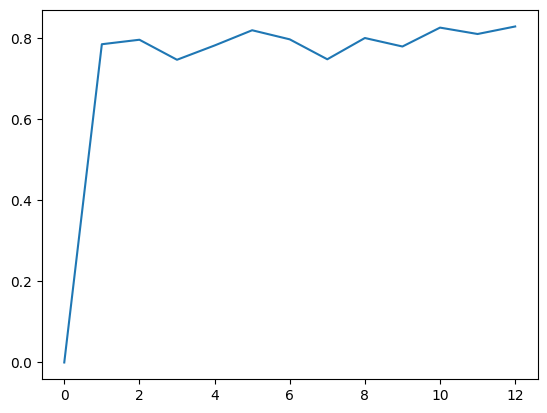

In [26]:
plt.plot(list_f1)
plt.show()

# Spiral data

In [32]:
X,y = read_dataset_csv('spiral_data.csv',header = True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train, y_test = train_test_split(X_scaled,y,test_size=0.75)
train_data = (X_train, y_train)
test_data  =(X_test,y_test)

Generation 0
Generation 10
Generation 20
Generation 30
Generation 40
Generation 50
Generation 60
Generation 70
Generation 80
Generation 90
Generation 100
Generation 110
Generation 120
Generation 130
Generation 140
Generation 150
Generation 160
Generation 170
Generation 180
Generation 190
Generation 200
Generation 210
Generation 220
Generation 230
Generation 240
Generation 250
Generation 260
Generation 270
Generation 280
Generation 290
Generation 300
Generation 310
Generation 320
Generation 330
Generation 340
Generation 350
Generation 360
Generation 370
Generation 380
Generation 390
Generation 400
Generation 410
Generation 420
Generation 430
Generation 440
Generation 450
Generation 460
Generation 470
Generation 480
Generation 490
Generation 500
Generation 510
Generation 520
Generation 530
Generation 540
Generation 550
Generation 560
Generation 570
Generation 580
Generation 590
Generation 600
Generation 610
Generation 620
Generation 630
Generation 640
Generation 650
Generation 660
Genera

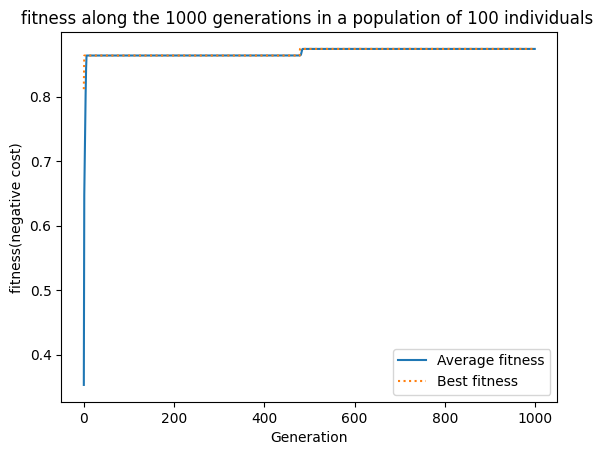

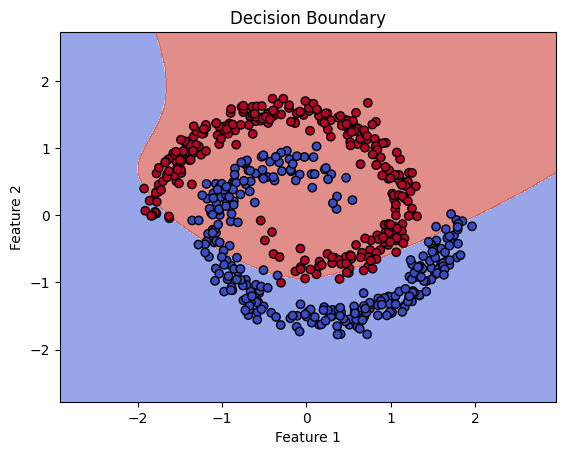

In [34]:
network_sizes = [2,4,8,10,6,1]
#Initialize the population
new_population = Evolution(network_sizes,100,1000)

#Run the evolution
best_network = new_population.generation_evolution(train_data)

print(best_network.evaluate(test_data))
new_population.plot_fitness()
best_network.plot_decision_boundary(test_data)